In [2]:
import numpy as np
import pandas as pd
import os
import sys

# Add the directory containing the VotingModel to the Python path
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from util.plot_results import plot_aggregation_results


from model.VotingModel import VotingModel
model = VotingModel(num_voters=144, num_projects=600, total_op_tokens=30e6)
model.step()


results_df=model.compile_fund_allocations()
data_dir = '/Users/idrees/Code/govxs/data'
os.makedirs(data_dir, exist_ok=True)

# Save the DataFrame to a CSV file in the data directory
results_df.to_csv(os.path.join(data_dir, 'vote_allocations.csv'), index=False)
print(results_df)

         Project  Mean Aggregation  Median Aggregation  Quadratic Aggregation
0      Project 1      51460.363527        50312.510511           52613.243387
1      Project 2      54049.862448        57034.352242           58041.491161
2      Project 3      50128.307271        47575.946617           49924.698944
3      Project 4      53780.198397        59754.269868           57463.777974
4      Project 5      42100.046397        40792.575134           35213.932248
..           ...               ...                 ...                    ...
595  Project 596      44463.712537        43391.183127           39279.035830
596  Project 597      56538.198978        50331.468372           63508.713496
597  Project 598      48262.087485        48664.428839           46276.614621
598  Project 599      49118.597515        53513.098781           47933.737273
599  Project 600      52493.507634        60089.711824           54747.029797

[600 rows x 4 columns]


Summary Statistics:
Mean Aggregation: Total Funds: 30000000.000000004, Max Funds: 63369.396923684246, Min Funds: 38897.909609069306
Median Aggregation: Total Funds: 30000000.0, Max Funds: 70162.12243804264, Min Funds: 34251.69216892218
Quadratic Aggregation: Total Funds: 30000000.000000007, Max Funds: 79698.65830335408, Min Funds: 30029.24323812431


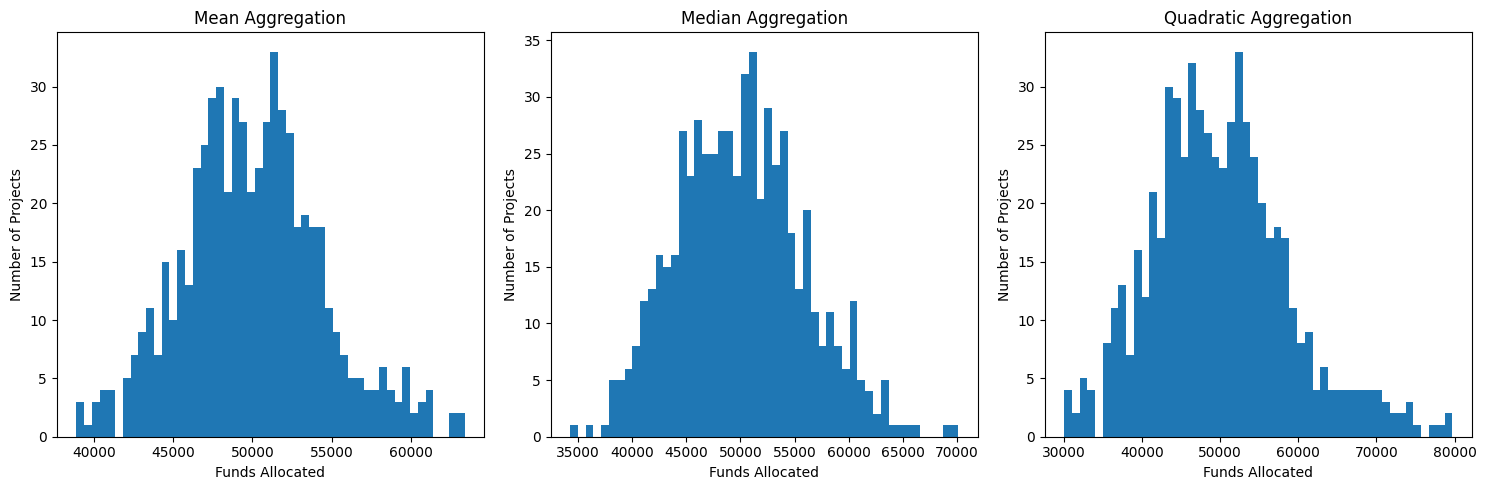

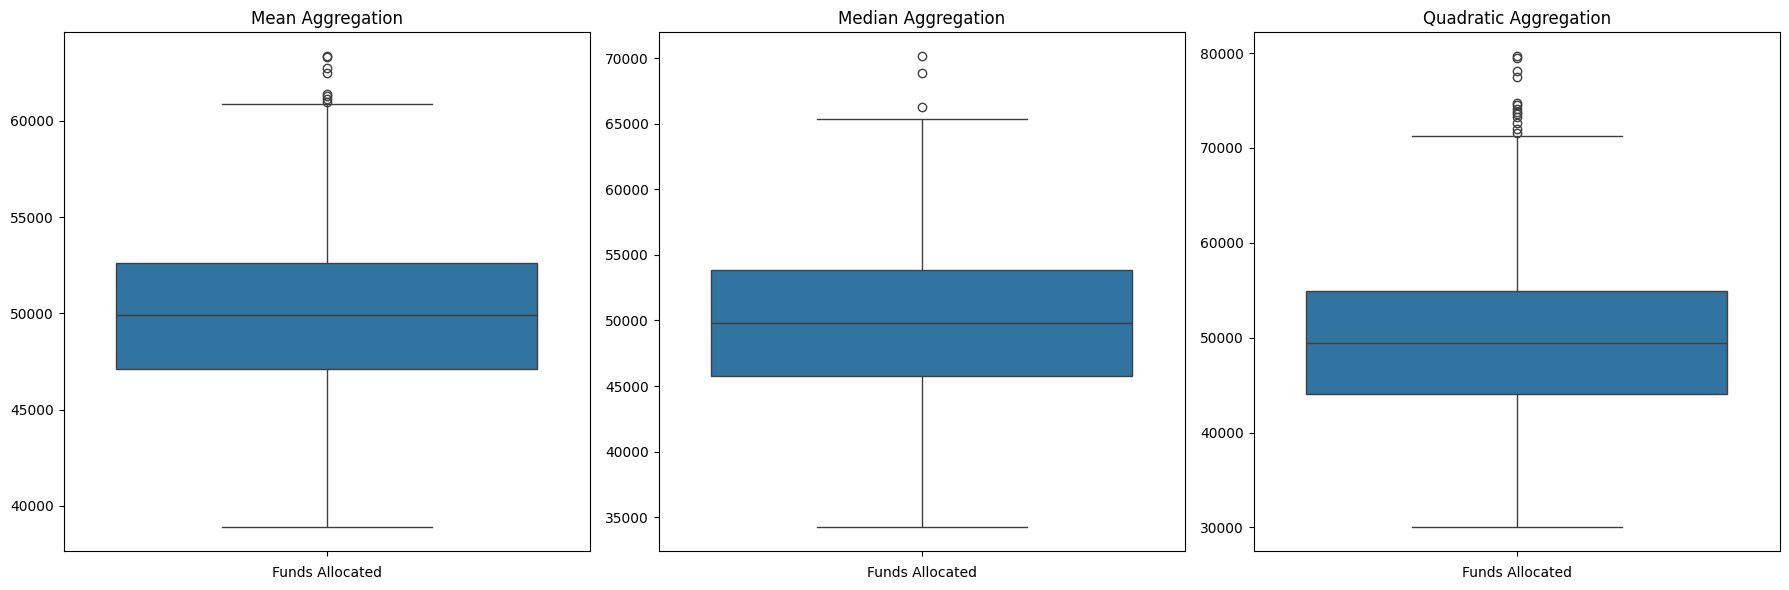

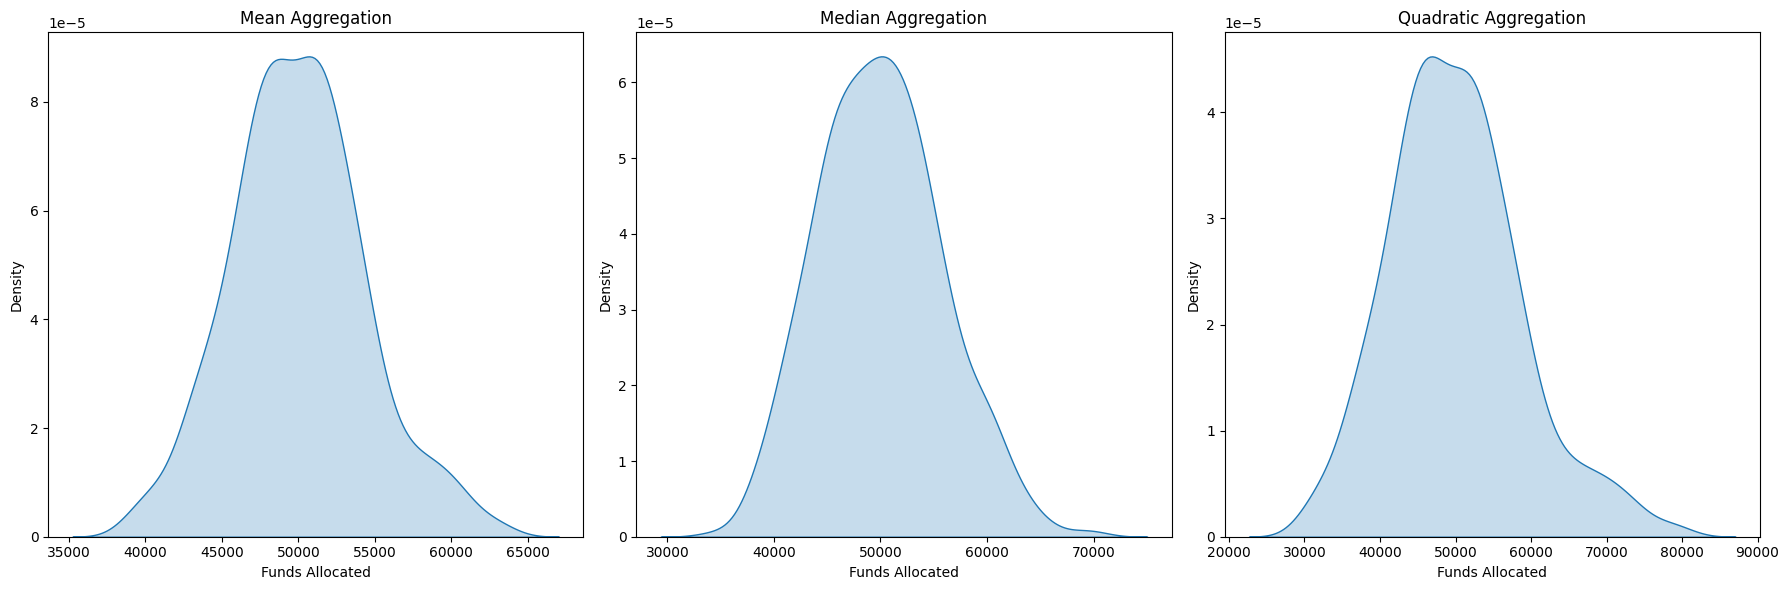

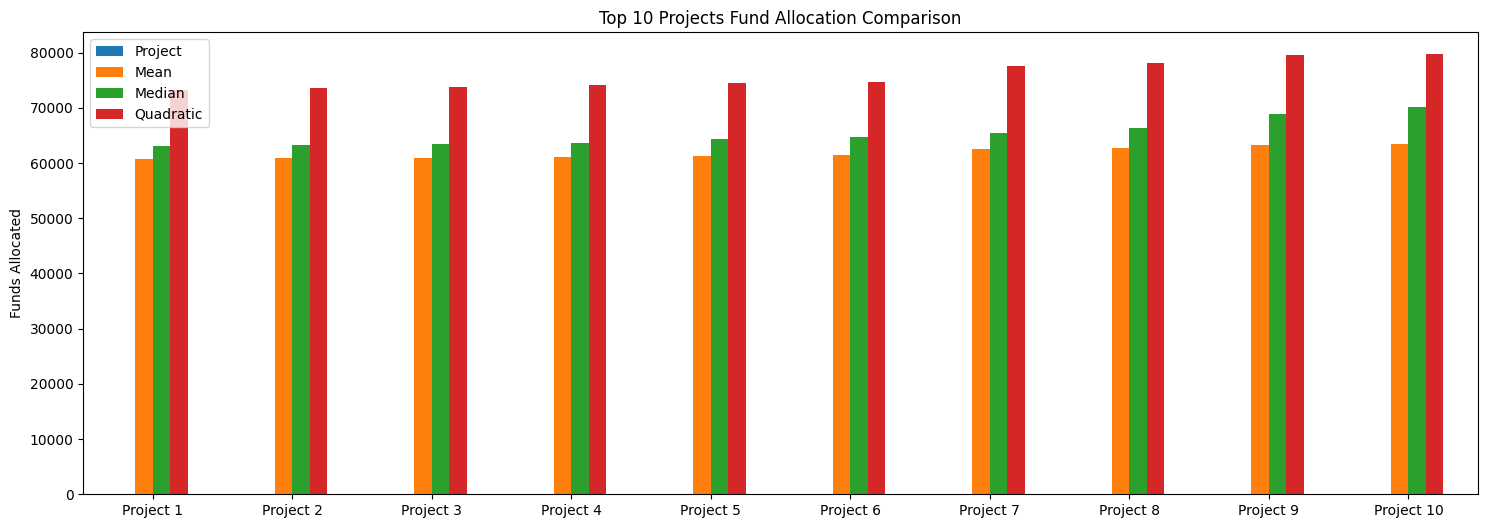

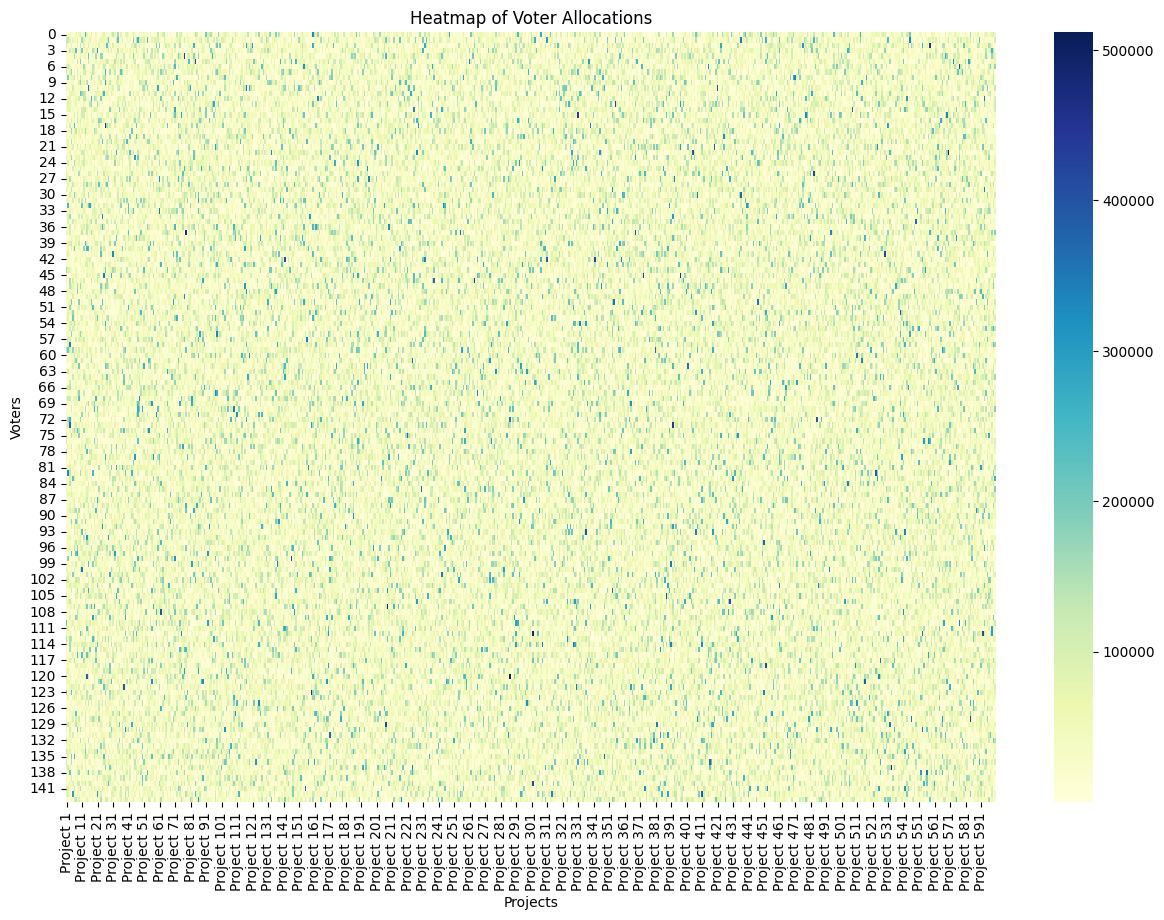

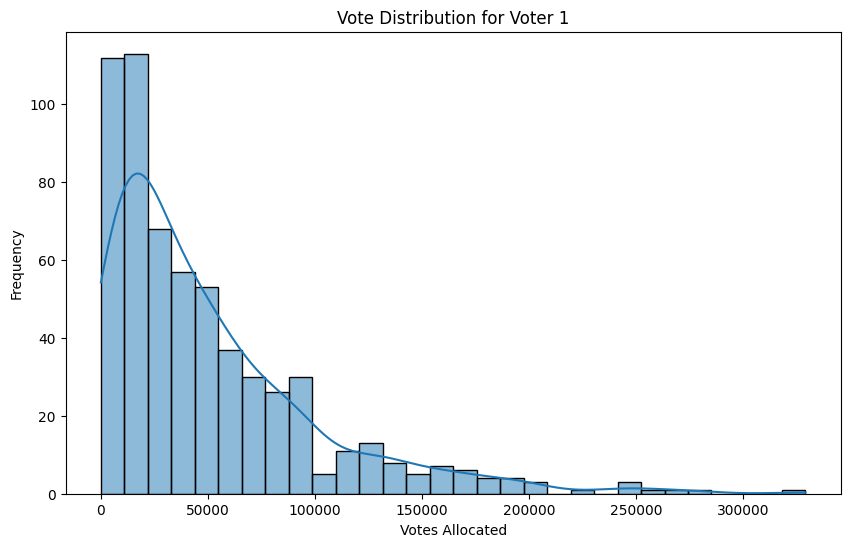

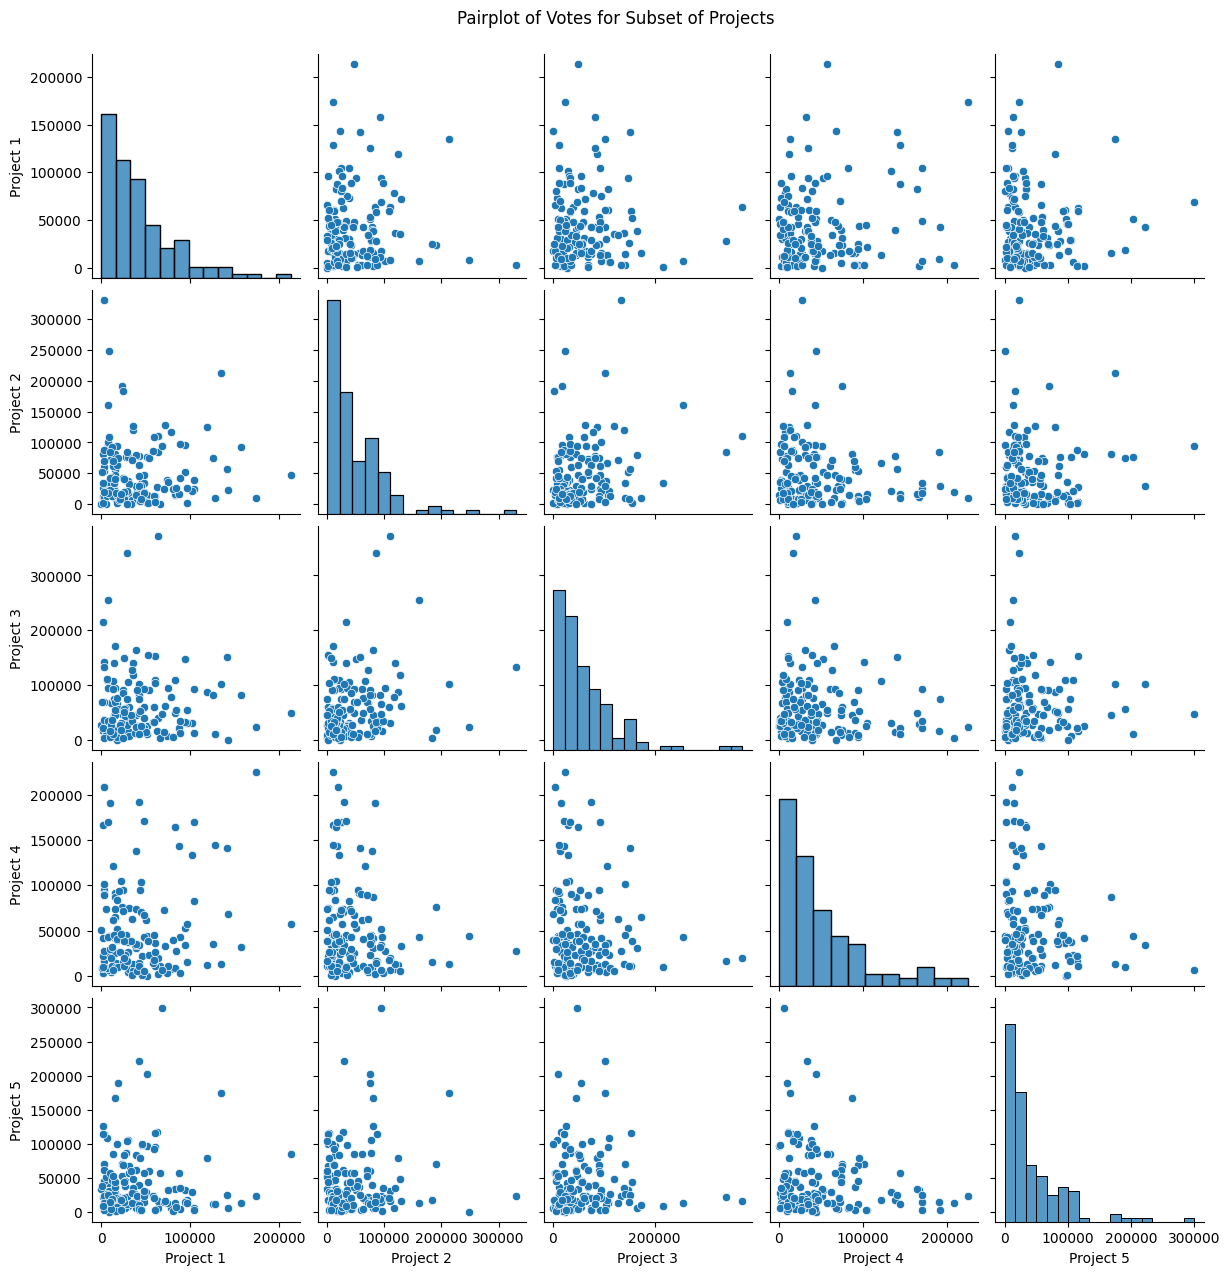

In [7]:
def plot_aggregation_results(mean_funds, median_funds, quadratic_funds, voting_matrix, num_top_projects=10):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    # Calculate summary statistics for each aggregation method
    total_mean_funds = np.sum(mean_funds)
    total_median_funds = np.sum(median_funds)
    total_quadratic_funds = np.sum(quadratic_funds)

    max_mean_funds = np.max(mean_funds)
    max_median_funds = np.max(median_funds)
    max_quadratic_funds = np.max(quadratic_funds)

    min_mean_funds = np.min(mean_funds)
    min_median_funds = np.min(median_funds)
    min_quadratic_funds = np.min(quadratic_funds)

    # Display the results
    print("Summary Statistics:")
    print(f"Mean Aggregation: Total Funds: {total_mean_funds}, Max Funds: {max_mean_funds}, Min Funds: {min_mean_funds}")
    print(f"Median Aggregation: Total Funds: {total_median_funds}, Max Funds: {max_median_funds}, Min Funds: {min_median_funds}")
    print(f"Quadratic Aggregation: Total Funds: {total_quadratic_funds}, Max Funds: {max_quadratic_funds}, Min Funds: {min_quadratic_funds}")

    # Histogram Plot
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(mean_funds, bins=50)
    plt.xlabel('Funds Allocated')
    plt.ylabel('Number of Projects')
    plt.title('Mean Aggregation')

    plt.subplot(1, 3, 2)
    plt.hist(median_funds, bins=50)
    plt.xlabel('Funds Allocated')
    plt.ylabel('Number of Projects')
    plt.title('Median Aggregation')

    plt.subplot(1, 3, 3)
    plt.hist(quadratic_funds, bins=50)
    plt.xlabel('Funds Allocated')
    plt.ylabel('Number of Projects')
    plt.title('Quadratic Aggregation')
    plt.tight_layout()
    plt.show()

    # Box Plot Visualization
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(mean_funds)
    plt.xlabel('Funds Allocated')
    plt.title('Mean Aggregation')

    plt.subplot(1, 3, 2)
    sns.boxplot(median_funds)
    plt.xlabel('Funds Allocated')
    plt.title('Median Aggregation')

    plt.subplot(1, 3, 3)
    sns.boxplot(quadratic_funds)
    plt.xlabel('Funds Allocated')
    plt.title('Quadratic Aggregation')
    plt.tight_layout()
    plt.show()

    # Density Plot Visualization
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.kdeplot(mean_funds, fill=True)
    plt.xlabel('Funds Allocated')
    plt.title('Mean Aggregation')

    plt.subplot(1, 3, 2)
    sns.kdeplot(median_funds, fill=True)
    plt.xlabel('Funds Allocated')
    plt.title('Median Aggregation')

    plt.subplot(1, 3, 3)
    sns.kdeplot(quadratic_funds, fill=True)
    plt.xlabel('Funds Allocated')
    plt.title('Quadratic Aggregation')
    plt.tight_layout()
    plt.show()

    # Comparison Bar Chart Visualization
    top_mean_projects = np.argsort(mean_funds)[-num_top_projects:]
    top_median_projects = np.argsort(median_funds)[-num_top_projects:]
    top_quadratic_projects = np.argsort(quadratic_funds)[-num_top_projects:]

    top_projects_data = {
        "Project": range(num_top_projects),
        "Mean": mean_funds[top_mean_projects],
        "Median": median_funds[top_median_projects],
        "Quadratic": quadratic_funds[top_quadratic_projects]
    }

    df_top_projects = pd.DataFrame(top_projects_data)
    df_top_projects.plot(kind="bar", figsize=(18, 6))
    plt.xticks(range(num_top_projects), [f"Project {i+1}" for i in range(num_top_projects)], rotation=0)
    plt.ylabel('Funds Allocated')
    plt.title('Top 10 Projects Fund Allocation Comparison')
    plt.show()

    # Convert the voting matrix to a DataFrame for visualization
    voting_df = pd.DataFrame(voting_matrix, columns=[f'Project {i}' for i in range(1, voting_matrix.shape[1] + 1)])
    voting_df['Voter'] = [f'Voter {i}' for i in range(1, voting_matrix.shape[0] + 1)]

    # Heatmap Visualization
    plt.figure(figsize=(15, 10))
    sns.heatmap(voting_df.drop(columns=['Voter']), cmap="YlGnBu", cbar=True)
    plt.xlabel('Projects')
    plt.ylabel('Voters')
    plt.title('Heatmap of Voter Allocations')
    plt.show()

    # Histogram Visualization (For a single voter)
    voter_id = 0  # Change this to visualize different voters
    plt.figure(figsize=(10, 6))
    sns.histplot(voting_df.iloc[voter_id, :-1], bins=30, kde=True)
    plt.xlabel('Votes Allocated')
    plt.ylabel('Frequency')
    plt.title(f'Vote Distribution for Voter {voter_id + 1}')
    plt.show()

    # Pairplot Visualization (For a subset of projects)
    num_projects_subset = 5
    subset_projects = voting_df.drop(columns=['Voter']).iloc[:, :num_projects_subset]
    sns.pairplot(subset_projects)
    plt.suptitle('Pairplot of Votes for Subset of Projects', y=1.02)
    plt.show()
mean_allocations = model.allocate_funds("mean")
median_allocations = model.allocate_funds("median")
quadratic_allocations = model.allocate_funds("quadratic")
plot_aggregation_results(mean_allocations,median_allocations,quadratic_allocations,model.voting_matrix,10)